In [1]:
import pandas as pd     #Collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np      #Foundational package for scientific computing
import matplotlib.pyplot as plt     #Collection of functions for scientific and publication-ready visualization

In [2]:
#Part I: Data cleaning, Variable selection, and Probability of Default model estimation
LoadDataset = pd.read_csv("C:/Users/Reza Vahlevi/Desktop/Data Scientist Intern/loan_data_2007_2014.csv", low_memory=False)
Load_DS = LoadDataset.copy()
Load_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [3]:
Load_DS['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [4]:
Load_DS['emp_length_int']=Load_DS['emp_length'].str.replace('\+ years','')
Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('< 1 year',str(0))
Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('n/a',str(0))
Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('years','')
Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('year','')

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_2796\619261004.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Load_DS['emp_length_int']=Load_DS['emp_length'].str.replace('\+ years','')


In [5]:
type(Load_DS['emp_length_int'][0])

str

In [6]:
Load_DS['emp_length_int'] =  pd.to_numeric(Load_DS['emp_length_int'])
type(Load_DS['emp_length_int'][0])

numpy.float64

In [7]:
Load_DS

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,4.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,10.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,7.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,3.0


In [8]:
Load_DS['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [9]:
Load_DS['term_int']=Load_DS['term'].str.replace('months','')
type(Load_DS['term_int'][0])

str

In [10]:
Load_DS['term_int']=pd.to_numeric(Load_DS['term_int'])
type(Load_DS['term_int'][0])

numpy.int64

In [11]:
Load_DS['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [12]:
Load_DS['earliest_cr_line_date']=pd.to_datetime(Load_DS['earliest_cr_line'], format='%b-%y')
Load_DS['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [13]:
pd.to_datetime('2019-12-01')-Load_DS['earliest_cr_line_date']

0        12752 days
1         7549 days
2         6604 days
3         8704 days
4         8735 days
            ...    
466280    6088 days
466281    8218 days
466282    6574 days
466283    6147 days
466284    7243 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [14]:
Load_DS['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2019-12-01')-Load_DS['earliest_cr_line_date'])/np.timedelta64(1,'M')))
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        263.482430
std          93.974829
min        -588.000000
25%         207.000000
50%         249.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [15]:
Load_DS.loc[: , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][Load_DS['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-513.0
1770,Sep-68,2068-09-01,-585.0
2799,Sep-64,2064-09-01,-537.0
3282,Sep-67,2067-09-01,-573.0
3359,Feb-65,2065-02-01,-542.0
...,...,...,...
464003,Jan-68,2068-01-01,-577.0
464260,Jul-66,2066-07-01,-559.0
465100,Oct-67,2067-10-01,-574.0
465500,Sep-67,2067-09-01,-573.0


In [16]:
Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()
(Load_DS['mths_since_earliest_cr_line']).describe()

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_2796\1540001153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()


count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [17]:
Load_DS['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [18]:
Load_DS['issue_date']=pd.to_datetime(Load_DS['issue_d'],format='%b-%y')
type(Load_DS['issue_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
pd.to_datetime('2019-12-01')-Load_DS['issue_date']

0        2922 days
1        2922 days
2        2922 days
3        2922 days
4        2922 days
            ...   
466280   2160 days
466281   2160 days
466282   2160 days
466283   2160 days
466284   2160 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [20]:
Load_DS['mths_since_issued_date']=round(pd.to_numeric((pd.to_datetime('2019-12-01')-Load_DS['issue_date'])/np.timedelta64(1,'M')))
Load_DS['mths_since_issued_date'].describe()

count    466285.000000
mean         75.255187
std          14.340154
min          60.000000
25%          65.000000
50%          71.000000
75%          81.000000
max         150.000000
Name: mths_since_issued_date, dtype: float64

In [21]:
min(Load_DS['mths_since_issued_date'])

60.0

In [22]:
Load_DS['term_int'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [23]:
min(Load_DS['term_int'])

36

In [24]:
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
Load_DS['delinq_2yrs']=Load_DS['delinq_2yrs'].astype(float)

In [26]:
Load_DS['delinq_2yrs'].describe()

count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [27]:
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
#Pre-processing the missing values
pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [29]:
Load_dumies_Data=[pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                 pd.get_dummies(Load_DS['verification_status'],prefix='verification_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['loan_status'],prefix='loan_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['purpose'],prefix='purpose',prefix_sep=':'),
                 pd.get_dummies(Load_DS['addr_state'],prefix='addr_state',prefix_sep=':'),
                 pd.get_dummies(Load_DS['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]

In [30]:
Load_dumies_Data=pd.concat(Load_dumies_Data, axis=1)
Load_dumies_Data

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
type(Load_dumies_Data)

pandas.core.frame.DataFrame

In [32]:
Load_DS=pd.concat([Load_DS,Load_dumies_Data], axis=1)
Load_DS.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [33]:
#Check the missing values
Load_DS.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
pd.options.display.max_rows= None

In [35]:
Load_DS.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [36]:
pd.options.display.max_rows=100

In [37]:
Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'], inplace=True)
Load_DS['total_rev_hi_lim'].isnull().sum()

0

In [38]:
Load_DS['annual_inc'].fillna(Load_DS['annual_inc'].mean(), inplace= True)
Load_DS['annual_inc'].isnull().sum()

0

In [39]:
Load_DS['mths_since_earliest_cr_line'].fillna('0',inplace= True)
Load_DS['mths_since_earliest_cr_line'].isnull().sum()

0

In [40]:
Load_DS['acc_now_delinq'].fillna('0',inplace=True)
Load_DS['acc_now_delinq'].isnull().sum()

0

In [41]:
Load_DS['total_acc'].fillna('0',inplace=True)
Load_DS['total_acc'].isnull().sum()

0

In [42]:
Load_DS['pub_rec'].fillna('0',inplace=True)
Load_DS['pub_rec'].isnull().sum()

0

In [43]:
Load_DS['open_acc'].fillna('0', inplace=True)
Load_DS['open_acc'].isnull().sum()

0

In [44]:
Load_DS['inq_last_6mths'].fillna('0',inplace=True)
Load_DS['inq_last_6mths'].isnull().sum()

0

In [45]:
Load_DS['delinq_2yrs'].fillna('0',inplace=True)
Load_DS['delinq_2yrs'].isnull().sum()

0

In [46]:
Load_DS['emp_length_int'].fillna('0',inplace=True)
Load_DS['emp_length_int'].isnull().sum()

0

In [47]:
#Probability of Default
Load_DS['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [48]:
Load_DS['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [49]:
Load_DS['loan_status'].value_counts()/Load_DS['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [50]:
Load_DS['good_bad'] = np.where(Load_DS['loan_status'].isin(['Charged Off', 'Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (31-120 days)']), 0, 1)
Load_DS['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 349276      349276  20762536   23034993      14000        14000   
 394941      394941  15750760   17843193      17350        17350   
 263750      263750  33381242   36024553       3000         3000   
 364123      364123  19656606   21879346      16000        16000   
 155870      155870   3728634    4721262      10000        10000   
 ...            ...       ...        ...        ...          ...   
 141200      141200   4776854    6049123      18000        18000   
 325211      325211  24304574   26707520      18000        18000   
 425206      425206  12499116   14511228      20000        20000   
 218783      218783   1244364    1485927      12300        12300   
 71385        71385   8494689   10246834      15000        15000   
 
         funded_amnt_inv        term  int_rate  installment grade  ...  \
 349276          14000.0   60 months     16.29       342.62     D  ...   
 394941          17350.0   36 mont

In [53]:
load_ds_input_train,load_ds_input_test,load_ds_targets_train,load_ds_targets_test=train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'])
load_ds_input_train.shape

(349713, 207)

In [54]:
load_ds_targets_train.shape

(349713,)

In [55]:
load_ds_input_test.shape

(116572, 207)

In [56]:
load_ds_targets_test.shape

(116572,)

In [57]:
load_ds_input_train,load_ds_input_test,load_ds_targets_train,load_ds_targets_test=train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'],test_size=0.2,random_state=42)
load_ds_input_train.shape

(373028, 207)

In [58]:
load_ds_targets_train.shape

(373028,)

In [59]:
load_ds_input_test.shape

(93257, 207)

In [60]:
load_ds_targets_test.shape

(93257,)

In [61]:
#Data preparation
df_inputs_prepr = load_ds_input_test
df_targets_prepr = load_ds_targets_test

In [62]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [63]:
df1= pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


In [64]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [65]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.962338
1,B,0.923085
2,C,0.882905
3,D,0.844314
4,E,0.805178
5,F,0.775472
6,G,0.697605


In [66]:
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
             df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [67]:
df1

,grade,good_bad,grade,good_bad
0,A,15108,A,0.962338
1,B,27199,B,0.923085
2,C,25048,C,0.882905
3,D,15390,D,0.844314
4,E,7145,E,0.805178
5,F,2699,F,0.775472
6,G,668,G,0.697605


In [68]:
df1=df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [69]:
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [70]:
df1

,grade,n_obs,prop_good
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [71]:
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [72]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,15108,0.962338,0.162004
1,B,27199,0.923085,0.291656
2,C,25048,0.882905,0.268591
3,D,15390,0.844314,0.165028
4,E,7145,0.805178,0.076616
5,F,2699,0.775472,0.028942
6,G,668,0.697605,0.007163


In [73]:
#Calculate the number of good variables and bad variables
df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15108,0.962338,0.162004,14539.0,569.0
1,B,27199,0.923085,0.291656,25107.0,2092.0
2,C,25048,0.882905,0.268591,22115.0,2933.0
3,D,15390,0.844314,0.165028,12994.0,2396.0
4,E,7145,0.805178,0.076616,5753.0,1392.0
5,F,2699,0.775472,0.028942,2093.0,606.0
6,G,668,0.697605,0.007163,466.0,202.0


In [74]:
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_good'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.006850
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.025184
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.035309
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.028844
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.016758
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.007295
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.002432


In [75]:
df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.006850,3.240710
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.025184,2.485026
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.035309,2.020230
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.028844,1.690687
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.016758,1.418980
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.007295,1.239474
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.002432,0.835918


In [76]:
df1= df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.002432,0.835918
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.007295,1.239474
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.016758,1.418980
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.028844,1.690687
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.035309,2.020230
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.025184,2.485026
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.006850,3.240710


In [77]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [78]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.002432,0.835918,NaN,NaN
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.007295,1.239474,0.077868,0.403556
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.016758,1.418980,0.029706,0.179506
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.028844,1.690687,0.039136,0.271707
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.035309,2.020230,0.038590,0.329543
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.025184,2.485026,0.040181,0.464796
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.006850,3.240710,0.039252,0.755683


In [79]:
df1['IV'] = df1['prop_n_good'] - df1['prop_n_bad']*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.002432,0.835918,NaN,NaN,0.760265
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.007295,1.239474,0.077868,0.403556,0.760265
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.016758,1.418980,0.029706,0.179506,0.760265
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.028844,1.690687,0.039136,0.271707,0.760265
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.035309,2.020230,0.038590,0.329543,0.760265
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.025184,2.485026,0.040181,0.464796,0.760265
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.006850,3.240710,0.039252,0.755683,0.760265


In [80]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df= df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [81]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.002432,0.835918,NaN,NaN,0.760265
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.007295,1.239474,0.077868,0.403556,0.760265
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.016758,1.418980,0.029706,0.179506,0.760265
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.028844,1.690687,0.039136,0.271707,0.760265
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.035309,2.020230,0.038590,0.329543,0.760265
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.025184,2.485026,0.040181,0.464796,0.760265
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.006850,3.240710,0.039252,0.755683,0.760265


In [82]:
#Processing discrete variables then visualize the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [83]:
def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ')+df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

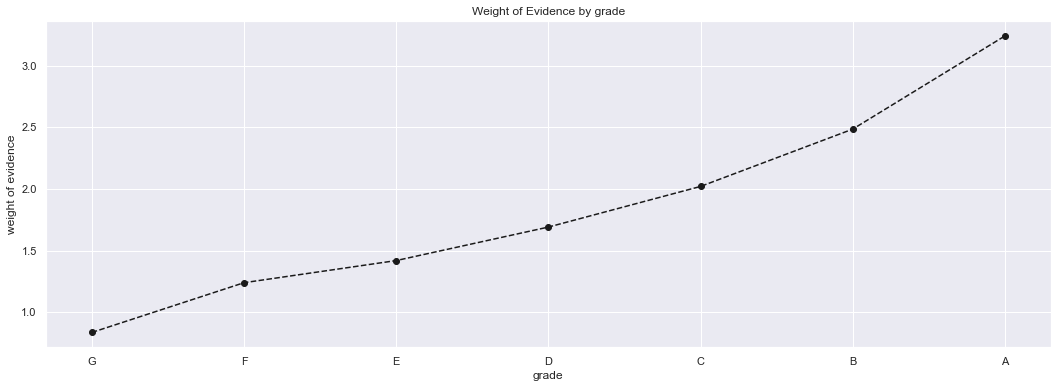

In [84]:
plot_by_woe(df_temp)

In [85]:
#Preprocessing discrete variables then create Dummy Variable 
df_temp=woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000421,0.000120,1.252763,NaN,NaN,0.744017
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000096,0.000024,1.386294,0.022222,0.133531,0.744017
2,RENT,37874,0.874003,0.406125,33102.0,4772.0,0.398498,0.057448,1.936828,0.074003,0.550534,0.744017
3,OWN,8409,0.888572,0.090170,7472.0,937.0,0.089951,0.011280,2.076235,0.014568,0.139406,0.744017
4,MORTGAGE,46919,0.904751,0.503115,42450.0,4469.0,0.511033,0.053800,2.251162,0.016179,0.174928,0.744017


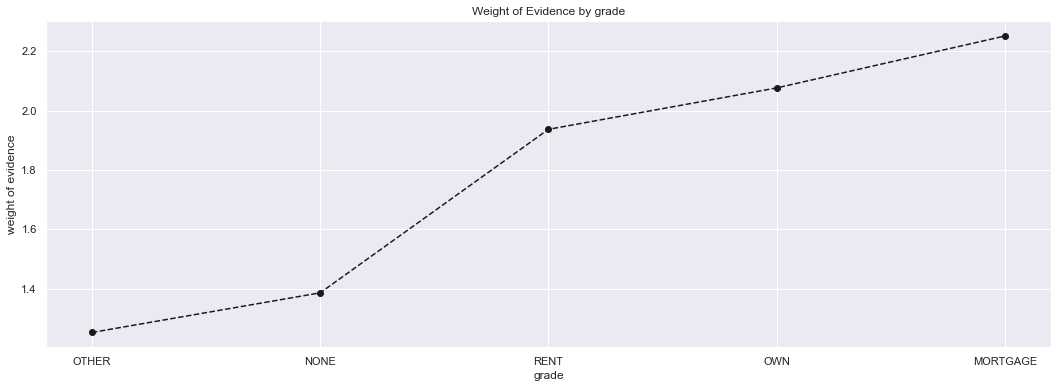

In [86]:
plot_by_woe(df_temp)

In [87]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                                           df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [88]:
#Preprocessing discrete variables: Dummy Variables
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [89]:
df_temp=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

c:\Users\Reza Vahlevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000012,-inf,NaN,NaN,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000012,0.000000,0.500000,inf,inf
2,NV,1298,0.855932,0.013919,1111.0,187.0,0.013375,0.002251,1.781907,0.355932,1.781907,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005032,0.000819,1.815974,0.004150,0.034067,inf
4,FL,6426,0.870059,0.068906,5591.0,835.0,0.067307,0.010052,1.901482,0.009977,0.085508,inf
5,AL,1182,0.873096,0.012675,1032.0,150.0,0.012424,0.001806,1.928619,0.003037,0.027137,inf
6,NJ,3676,0.875408,0.039418,3218.0,458.0,0.038740,0.005514,1.949646,0.002312,0.021027,inf
7,LA,1130,0.876106,0.012117,990.0,140.0,0.011918,0.001685,1.956063,0.000698,0.006416,inf
8,NY,8031,0.879965,0.086117,7067.0,964.0,0.085076,0.011605,1.992100,0.003859,0.036038,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004274,0.000578,2.000917,0.000928,0.008817,inf


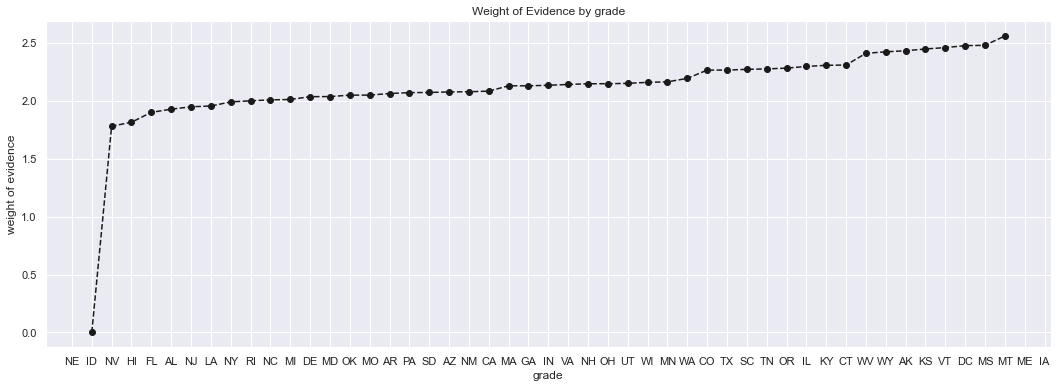

In [90]:
plot_by_woe(df_temp)

In [91]:
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

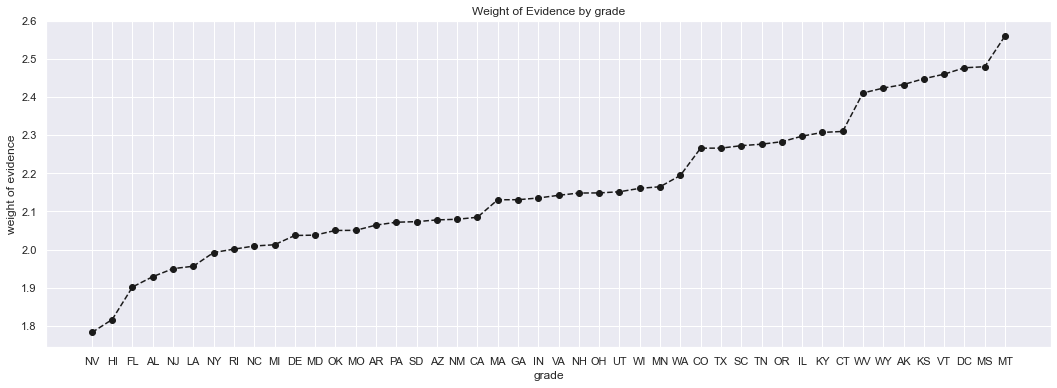

In [92]:
plot_by_woe(df_temp.iloc[2:-2,:])

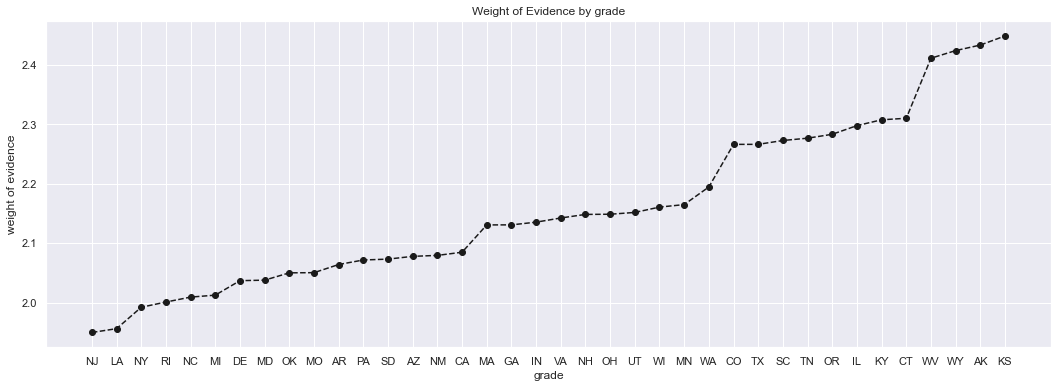

In [93]:
plot_by_woe(df_temp.iloc[6:-6,:])

In [94]:
df_inputs_prepr['addr_state:ND_NE_IA_NC_FL_HI_AL']=sum([df_inputs_prepr['addr_state:ND'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:HI'], 
                                                       df_inputs_prepr['addr_state:AL']])
df_inputs_prepr['addr_state:NM_VA']=sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])
df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:NC']])
df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:NJ']])
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])
df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])
df_inputs_prepr['addr_state:GA_WA_OR']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])
df_inputs_prepr['addr_state:WI_MT']=sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])
df_inputs_prepr['addr_state:IL_CT']=sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])
df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:MS']])
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID']])

In [95]:
df_inputs_prepr['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [96]:
df_temp=woe_discrete(df_inputs_prepr,'verification_status',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33641,0.872031,0.360734,29336.0,4305.0,0.353161,0.051826,1.919038,NaN,NaN,0.744001
1,Source Verified,29963,0.895738,0.321295,26839.0,3124.0,0.323101,0.037608,2.150742,0.023707,0.231704,0.744001
2,Not Verified,29653,0.906890,0.317971,26892.0,2761.0,0.323739,0.033238,2.276236,0.011152,0.125494,0.744001


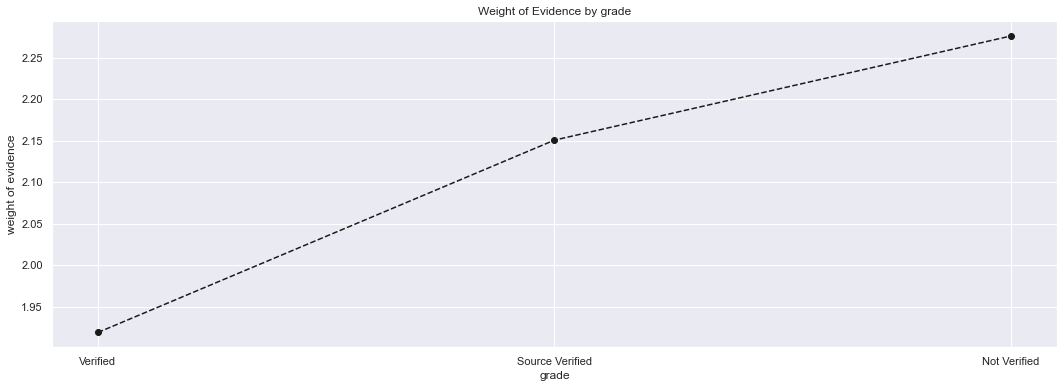

In [97]:
plot_by_woe(df_temp)

In [98]:
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'vacation', 'house', 'medical', 'small_business', 'car', 'other',
       'major_purchase', 'wedding', 'moving', 'educational',
       'renewable_energy'], dtype=object)

In [99]:
df_temp=woe_discrete(df_inputs_prepr,'purpose',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,89,0.752809,0.000954,67.0,22.0,0.000807,0.000265,1.113650,NaN,NaN,0.745483
1,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000650,0.000193,1.216395,0.018620,0.102745,0.745483
2,small_business,1431,0.777079,0.015345,1112.0,319.0,0.013387,0.003840,1.248724,0.005650,0.032329,0.745483
3,medical,918,0.857298,0.009844,787.0,131.0,0.009474,0.001577,1.793031,0.080220,0.544307,0.745483
4,house,439,0.858770,0.004707,377.0,62.0,0.004539,0.000746,1.805111,0.001471,0.012080,0.745483
5,other,4806,0.861007,0.051535,4138.0,668.0,0.049815,0.008042,1.823680,0.002237,0.018569,0.745483
6,wedding,456,0.864035,0.004890,394.0,62.0,0.004743,0.000746,1.849217,0.003028,0.025537,0.745483
7,moving,602,0.878738,0.006455,529.0,73.0,0.006368,0.000879,1.980529,0.014702,0.131312,0.745483
8,vacation,496,0.881048,0.005319,437.0,59.0,0.005261,0.000710,2.002396,0.002311,0.021867,0.745483
9,debt_consolidation,55012,0.885916,0.589897,48736.0,6276.0,0.586707,0.075553,2.049685,0.004867,0.047289,0.745483


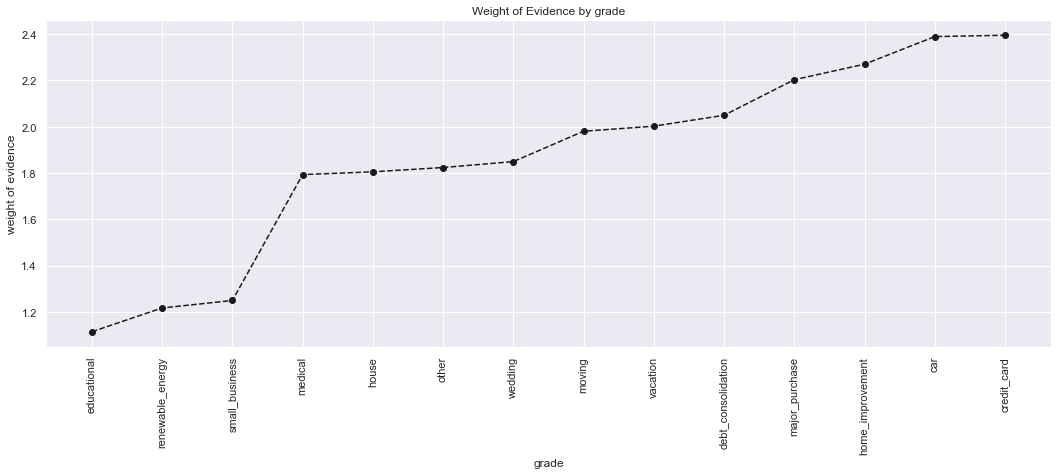

In [100]:
plot_by_woe(df_temp,90)

In [101]:
df_inputs_prepr['purpose:educ_sm_b_wedd_ren_en_mov_house']=sum([df_inputs_prepr['purpose:small_business'],df_inputs_prepr['purpose:educational'],
                                                               df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving'],
                                  -                              df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:medical'],df_inputs_prepr['purpose:wedding'],
                                                               df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:debt_consolidation'],
                                                               df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:major_purchase'],
                                                               df_inputs_prepr['purpose:car'],df_inputs_prepr['purpose:credit_card']])

In [102]:
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [103]:
df_temp=woe_discrete(df_inputs_prepr,'initial_list_status',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60491,0.879685,0.648648,53213.0,7278.0,0.640603,0.087616,1.989447,NaN,NaN,0.7441
1,w,32766,0.911127,0.351352,29854.0,2912.0,0.359397,0.035056,2.327479,0.031443,0.338032,0.7441


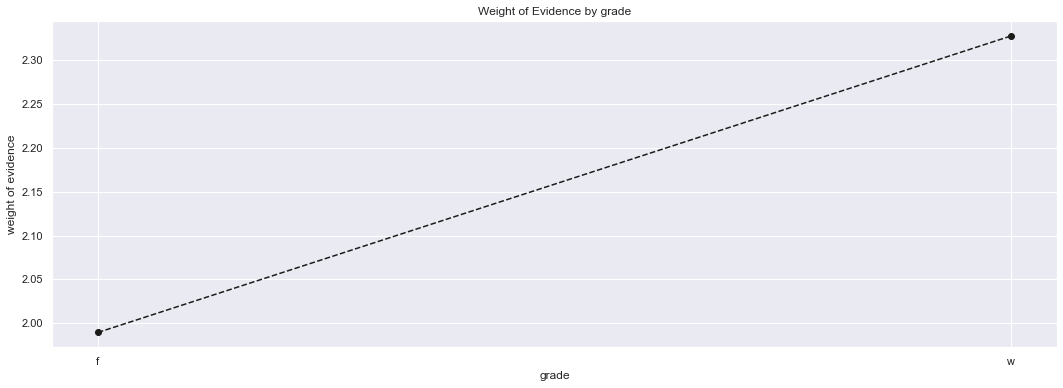

In [104]:
plot_by_woe(df_temp)

In [105]:
#Preprocessing continuous variables: automating calculations and visualizing the results
def woe_continuous(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [106]:
#Preprocessing continuous variables: creating dummy variables
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [107]:
df_temp=woe_continuous(df_inputs_prepr, 'term_int',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.079189,2.226422,NaN,NaN,0.744909
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.043483,1.811814,0.043016,0.414608,0.744909


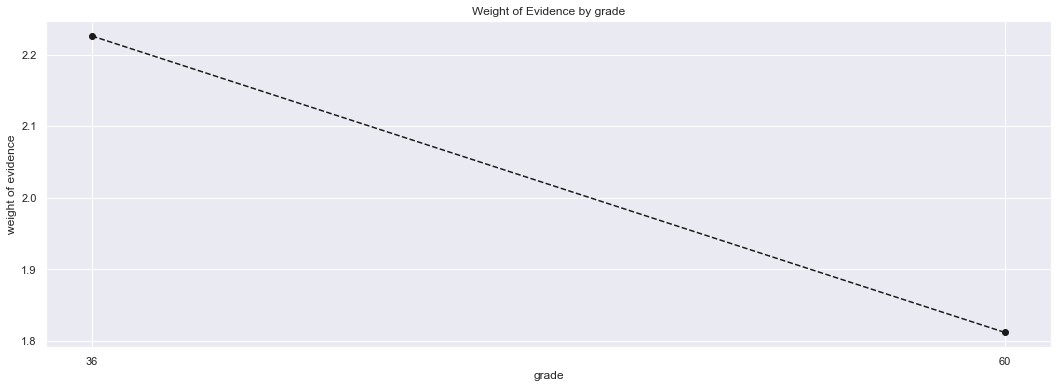

In [108]:
plot_by_woe(df_temp)

In [109]:
df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [110]:
df_inputs_prepr['emp_length_int'].unique()

array([0.0, 10.0, 1.0, 2.0, 9.0, '0', 3.0, 6.0, 4.0, 7.0, 8.0, 5.0],
      dtype=object)

In [111]:
df_temp=woe_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7353,0.880457,0.078847,6474.0,879.0,0.077937,0.010582,1.996765,NaN,NaN,0.743128
1,1.0,5968,0.892594,0.063995,5327.0,641.0,0.064129,0.007717,2.117514,0.012137,0.120750,0.743128
2,2.0,8295,0.887402,0.088948,7361.0,934.0,0.088615,0.011244,2.064475,0.005192,0.053039,0.743128
3,3.0,7391,0.889325,0.079254,6573.0,818.0,0.079129,0.009847,2.083863,0.001923,0.019389,0.743128
4,4.0,5555,0.889469,0.059567,4941.0,614.0,0.059482,0.007392,2.085328,0.000144,0.001465,0.743128
5,5.0,6172,0.886261,0.066183,5470.0,702.0,0.065850,0.008451,2.053100,0.003208,0.032228,0.743128
6,6.0,5225,0.878852,0.056028,4592.0,633.0,0.055281,0.007620,1.981601,0.007409,0.071500,0.743128
7,7.0,5131,0.893588,0.055020,4585.0,546.0,0.055196,0.006573,2.127926,0.014736,0.146326,0.743128
8,8.0,4542,0.890137,0.048704,4043.0,499.0,0.048672,0.006007,2.092136,0.003451,0.035790,0.743128
9,9.0,3621,0.892847,0.038828,3233.0,388.0,0.038920,0.004671,2.120160,0.002711,0.028024,0.743128


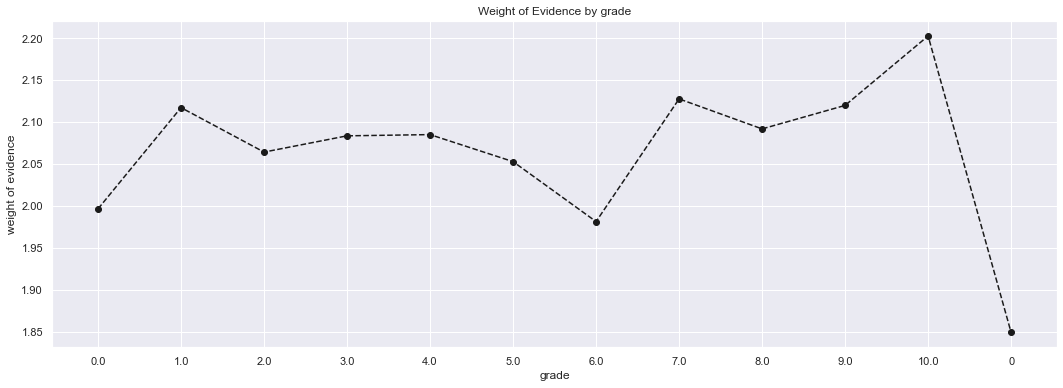

In [112]:
plot_by_woe(df_temp)

In [113]:
df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [114]:
df_inputs_prepr['mths_since_issued_date'].unique()

array([ 65.,  62.,  90.,  61.,  82.,  74., 110.,  75.,  72.,  83.,  96.,
       101.,  71.,  70.,  80.,  79., 143.,  87., 126.,  63.,  77.,  64.,
        76.,  67.,  73.,  81.,  69.,  60.,  78.,  98.,  68.,  97., 127.,
        94., 119., 113.,  92., 106.,  95., 100., 128.,  89., 104., 115.,
        99.,  91.,  66.,  85.,  88.,  84., 109., 112., 134., 120., 102.,
       107.,  93., 114.,  86., 132., 103., 116., 142., 123., 105., 139.,
       121., 138., 140., 124., 117., 141., 130., 148., 125., 149., 111.,
       108., 118., 129., 133., 122., 131., 136., 137., 146., 135., 144.,
       145., 147., 150.])

In [115]:
df_inputs_prepr['mths_since_issued_date_factor']=pd.cut(df_inputs_prepr['mths_since_issued_date'],50)

In [116]:
df_inputs_prepr['mths_since_issued_date_factor']

362514     (63.6, 65.4]
288564     (61.8, 63.6]
213591     (88.8, 90.6]
263083    (59.91, 61.8]
165001     (81.6, 83.4]
              ...      
115        (94.2, 96.0]
296284     (61.8, 63.6]
61777      (72.6, 74.4]
91763      (74.4, 76.2]
167512     (81.6, 83.4]
Name: mths_since_issued_date_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(59.91, 61.8] < (61.8, 63.6] < (63.6, 65.4] < (65.4, 67.2] ... (142.8, 144.6] < (144.6, 146.4] < (146.4, 148.2] < (148.2, 150.0]]

In [117]:
df_temp=woe_continuous(df_inputs_prepr,'mths_since_issued_date_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(59.91, 61.8]",7191,0.945766,0.077109,6801.0,390.0,0.081874,0.004695,2.858678,NaN,NaN,0.750229
1,"(61.8, 63.6]",9752,0.930373,0.104571,9073.0,679.0,0.109225,0.008174,2.592437,0.015392,0.266241,0.750229
2,"(63.6, 65.4]",9506,0.919945,0.101933,8745.0,761.0,0.105276,0.009161,2.441604,0.010428,0.150833,0.750229
3,"(65.4, 67.2]",7240,0.909116,0.077635,6582.0,658.0,0.079237,0.007921,2.302889,0.010829,0.138715,0.750229
4,"(67.2, 69.0]",7217,0.902868,0.077388,6516.0,701.0,0.078443,0.008439,2.229508,0.006248,0.073381,0.750229
5,"(69.0, 70.8]",3104,0.895296,0.033284,2779.0,325.0,0.033455,0.003913,2.146021,0.007572,0.083487,0.750229
6,"(70.8, 72.6]",6197,0.890269,0.066451,5517.0,680.0,0.066416,0.008186,2.093497,0.005027,0.052525,0.750229
7,"(72.6, 74.4]",5821,0.885930,0.062419,5157.0,664.0,0.062082,0.007994,2.049828,0.004339,0.043669,0.750229
8,"(74.4, 76.2]",5021,0.878909,0.053840,4413.0,608.0,0.053126,0.007319,1.982135,0.007022,0.067693,0.750229
9,"(76.2, 78.0]",4497,0.874138,0.048222,3931.0,566.0,0.047323,0.006814,1.938055,0.004770,0.044080,0.750229


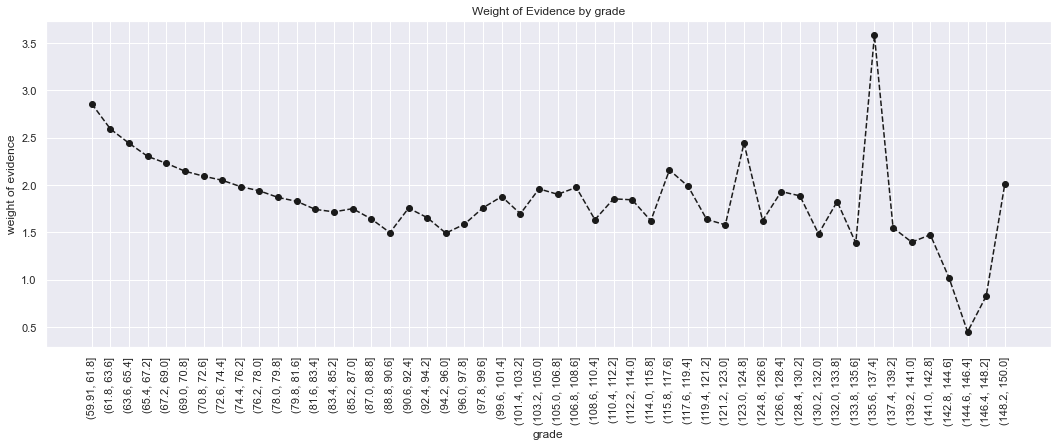

In [118]:
plot_by_woe(df_temp,90)

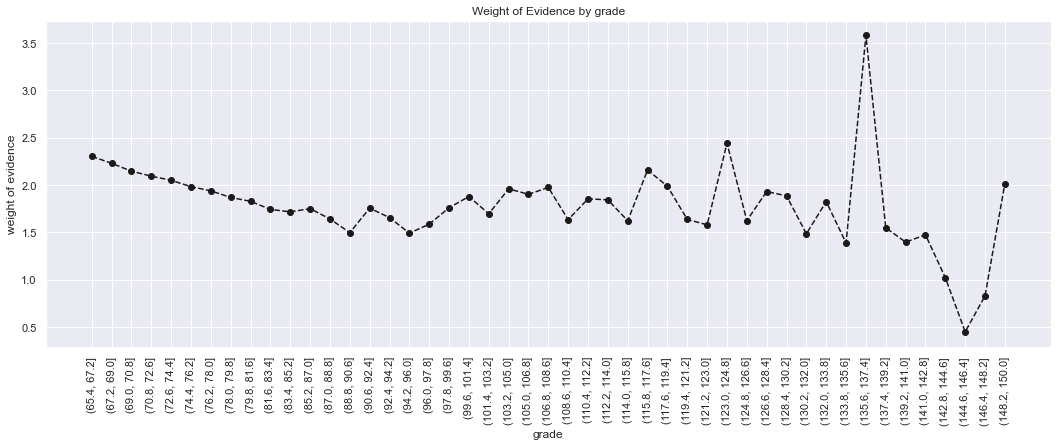

In [119]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [120]:
df_inputs_prepr['mths_since_issued_date:<38']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38)),1,0)
df_inputs_prepr['mths_since_issued_date:38-39']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38,40)),1,0)
df_inputs_prepr['mths_since_issued_date:40-41']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(40,42)),1,0)
df_inputs_prepr['mths_since_issued_date:42-48']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(42,49)),1,0)
df_inputs_prepr['mths_since_issued_date:49-52']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(49,53)),1,0)
df_inputs_prepr['mths_since_issued_date:53-64']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(53,65)),1,0)
df_inputs_prepr['mths_since_issued_date:65-84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(65,85)),1,0)
df_inputs_prepr['mths_since_issued_date:>84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(85,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [121]:
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'],50)

In [122]:
df_temp=woe_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000072,3.465736,NaN,NaN,0.76374
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.000506,3.884994,0.010169,0.419258,0.76374
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.000662,3.552226,0.007728,0.332768,0.76374
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.000277,2.982603,0.020356,0.569623,0.76374
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.000181,3.962716,0.029561,0.980113,0.76374
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.001348,3.331247,0.015858,0.631469,0.76374
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.001433,2.965879,0.014477,0.365368,0.76374
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.000698,3.330972,0.014468,0.365093,0.76374
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.001661,2.789652,0.023362,0.541320,0.76374
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.000445,3.737026,0.034615,0.947373,0.76374


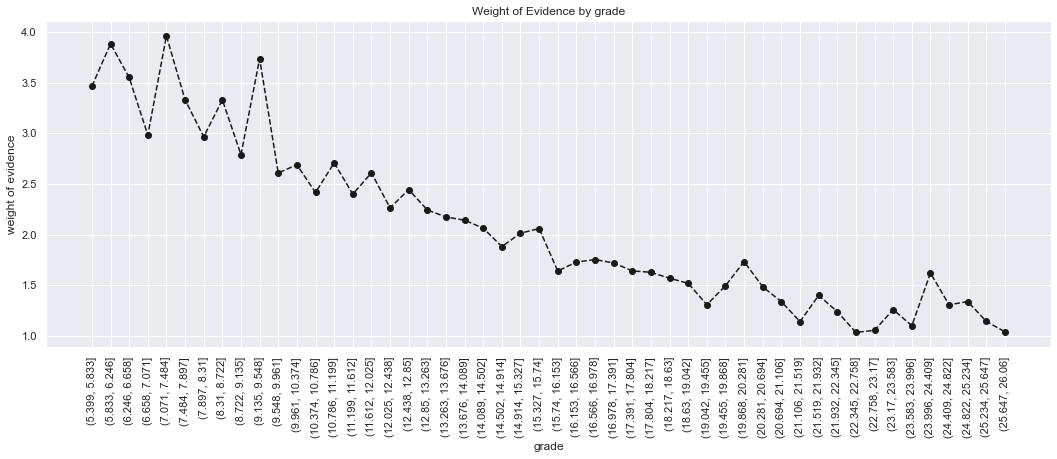

In [123]:
plot_by_woe(df_temp,90)

In [124]:
df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)

In [125]:
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp=woe_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.000457,2.000769,NaN,NaN,0.743785
1,"(1190.0, 1880.0]",800,0.896250,0.008578,717.0,83.0,0.008632,0.000999,2.156235,0.015372,0.155467,0.743785
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.001818,2.199430,0.003948,0.043194,0.743785
3,"(2570.0, 3260.0]",1817,0.893781,0.019484,1624.0,193.0,0.019550,0.002323,2.129957,0.006417,0.069472,0.743785
4,"(3260.0, 3950.0]",1245,0.891566,0.013350,1110.0,135.0,0.013363,0.001625,2.106841,0.002215,0.023117,0.743785
5,"(3950.0, 4640.0]",2298,0.882942,0.024642,2029.0,269.0,0.024426,0.003238,2.020587,0.008625,0.086254,0.743785
6,"(4640.0, 5330.0]",3957,0.898155,0.042431,3554.0,403.0,0.042785,0.004852,2.176892,0.015213,0.156305,0.743785
7,"(5330.0, 6020.0]",4186,0.906593,0.044887,3795.0,391.0,0.045686,0.004707,2.272732,0.008438,0.095840,0.743785
8,"(6020.0, 6710.0]",1718,0.881839,0.018422,1515.0,203.0,0.018238,0.002444,2.009965,0.024754,0.262767,0.743785
9,"(6710.0, 7400.0]",2880,0.893403,0.030882,2573.0,307.0,0.030975,0.003696,2.125980,0.011563,0.116015,0.743785


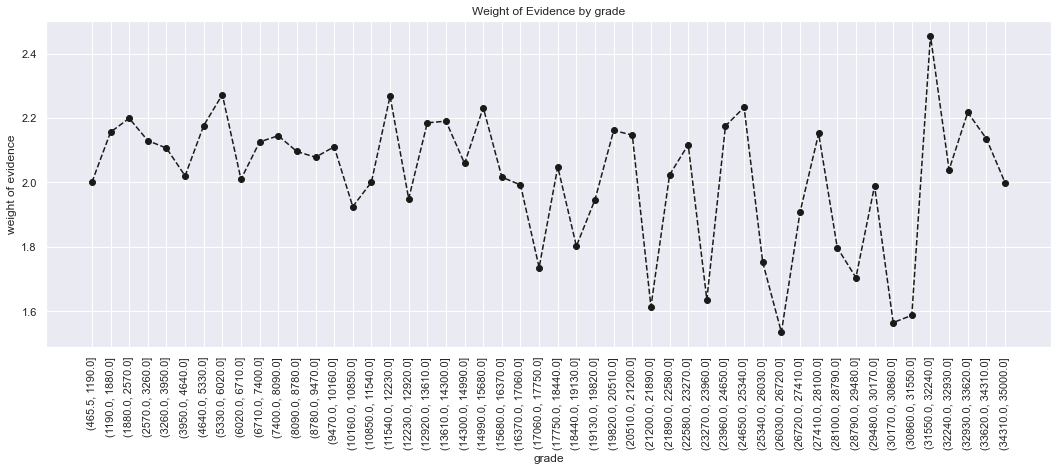

In [126]:
plot_by_woe(df_temp,90)

In [127]:
df_inputs_prepr['mths_since_earliest_cr_line']=df_inputs_prepr['mths_since_earliest_cr_line'].astype(float)

In [128]:
df_inputs_prepr['mths_since_earliest_cr_line_factor']=pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)

In [129]:
df_inputs_prepr['mths_since_earliest_cr_line_factor']

362514    (207.74, 219.96]
288564    (195.52, 207.74]
213591    (207.74, 219.96]
263083    (134.42, 146.64]
165001    (391.04, 403.26]
                ...       
115       (158.86, 171.08]
296284    (391.04, 403.26]
61777     (281.06, 293.28]
91763     (317.72, 329.94]
167512     (244.4, 256.62]
Name: mths_since_earliest_cr_line_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(-0.611, 12.22] < (12.22, 24.44] < (24.44, 36.66] < (36.66, 48.88] ... (562.12, 574.34] < (574.34, 586.56] < (586.56, 598.78] < (598.78, 611.0]]

In [130]:
df_temp=woe_continuous(df_inputs_prepr,'mths_since_earliest_cr_line_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.611, 12.22]",5,1.000000,0.000054,5.0,0.0,0.000060,0.000000,inf,NaN,NaN,0.743597
1,"(12.22, 24.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743597
2,"(24.44, 36.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743597
3,"(36.66, 48.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743597
4,"(48.88, 61.1]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743597
5,"(61.1, 73.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743597
6,"(73.32, 85.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743597
7,"(85.54, 97.76]",1,1.000000,0.000011,1.0,0.0,0.000012,0.000000,inf,NaN,NaN,0.743597
8,"(97.76, 109.98]",291,0.924399,0.003120,269.0,22.0,0.003238,0.000265,2.503669,0.075601,inf,0.743597
9,"(109.98, 122.2]",666,0.890390,0.007142,593.0,73.0,0.007139,0.000879,2.094735,0.034008,0.408934,0.743597


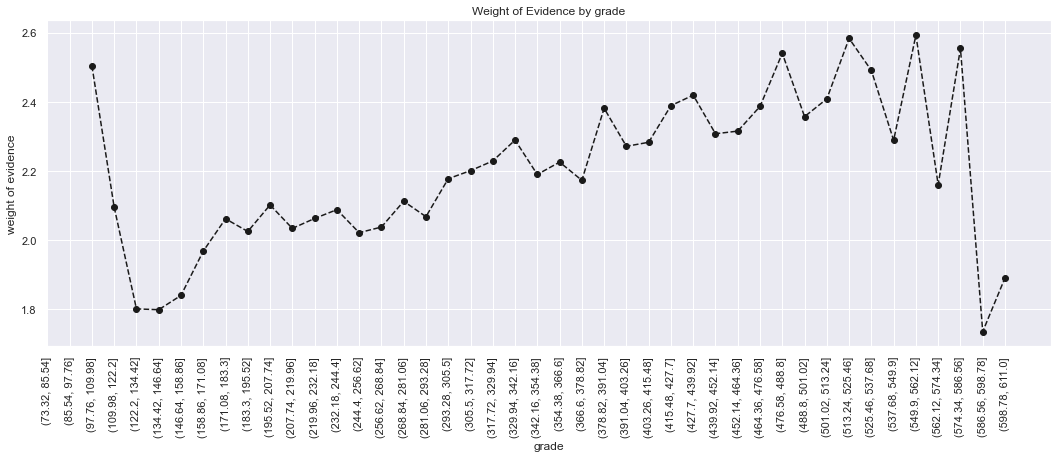

In [131]:
plot_by_woe(df_temp,90)

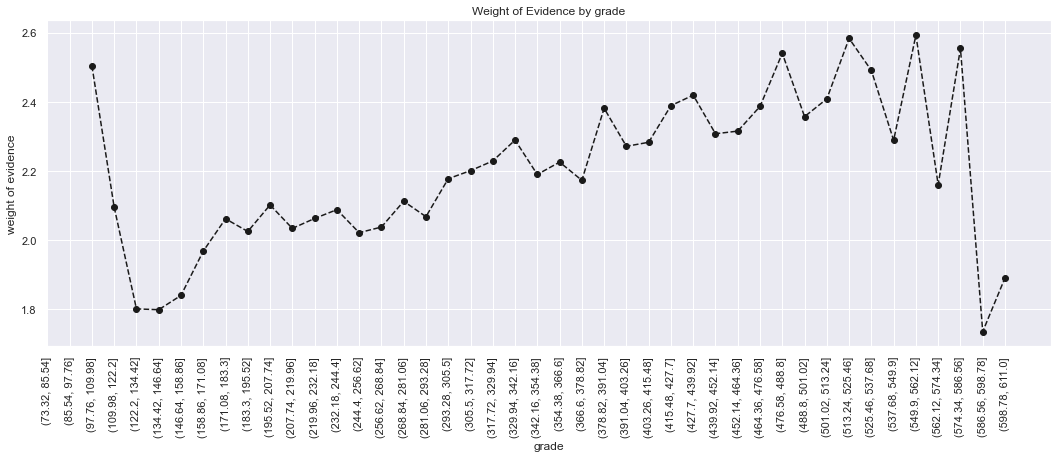

In [132]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [133]:
df_inputs_prepr['mths_since_earliest_cr_line:<140']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:140-239']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140,240)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:240-339']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(240,340)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:340-439']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(340,440)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:440-539']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(440,540)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:540-600']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(540,600)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:>600']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(600, int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [134]:
df_inputs_prepr['installment'].unique()

array([ 773.01,  297.53, 1034.83, ...,  414.23,  494.33,  121.42])

In [135]:
df_inputs_prepr['installment_factor']=pd.cut(df_inputs_prepr['installment'],50)
df_temp=woe_continuous(df_inputs_prepr,'installment_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.369, 43.585]",485,0.872165,0.005201,423.0,62.0,0.005092,0.000746,1.920238,NaN,NaN,0.743531
1,"(43.585, 71.41]",1246,0.904494,0.013361,1127.0,119.0,0.013567,0.001433,2.248191,0.032329,0.327953,0.743531
2,"(71.41, 99.235]",1731,0.895436,0.018562,1550.0,181.0,0.018660,0.002179,2.147513,0.009058,0.100678,0.743531
3,"(99.235, 127.06]",2292,0.896597,0.024577,2055.0,237.0,0.024739,0.002853,2.159971,0.001161,0.012458,0.743531
4,"(127.06, 154.885]",2602,0.886241,0.027901,2306.0,296.0,0.027761,0.003563,2.052910,0.010356,0.107061,0.743531
5,"(154.885, 182.71]",4133,0.897653,0.044318,3710.0,423.0,0.044663,0.005092,2.171415,0.011412,0.118505,0.743531
6,"(182.71, 210.535]",4109,0.905086,0.044061,3719.0,390.0,0.044771,0.004695,2.255063,0.007433,0.083648,0.743531
7,"(210.535, 238.36]",3730,0.901877,0.039997,3364.0,366.0,0.040497,0.004406,2.218253,0.003210,0.036811,0.743531
8,"(238.36, 266.185]",4660,0.899785,0.049969,4193.0,467.0,0.050477,0.005622,2.194842,0.002091,0.023410,0.743531
9,"(266.185, 294.01]",4975,0.888844,0.053347,4422.0,553.0,0.053234,0.006657,2.078989,0.010941,0.115853,0.743531


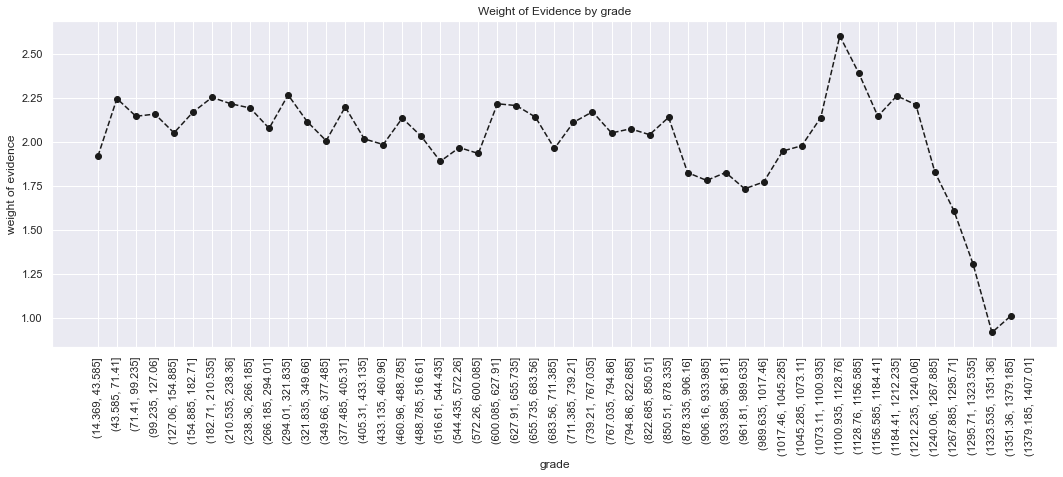

In [136]:
plot_by_woe(df_temp,90)

In [137]:
df_inputs_prepr['delinq_2yrs']=df_inputs_prepr['delinq_2yrs'].astype(float)

In [138]:
df_inputs_prepr['delinq_2yrs_factors']=pd.cut(df_inputs_prepr['delinq_2yrs'],50)

In [139]:
df_temp=woe_continuous(df_inputs_prepr,'delinq_2yrs',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,76566,0.890944,0.821021,68216.0,8350.0,0.821217,0.100521,2.100418,NaN,NaN,0.742482
1,1.0,11297,0.890413,0.121138,10059.0,1238.0,0.121095,0.014904,2.094971,0.000530,0.005447,0.742482
2,2.0,3192,0.885025,0.034228,2825.0,367.0,0.034009,0.004418,2.040902,0.005388,0.054069,0.742482
3,3.0,1134,0.893298,0.012160,1013.0,121.0,0.012195,0.001457,2.124881,0.008273,0.083979,0.742482
4,4.0,510,0.886275,0.005469,452.0,58.0,0.005441,0.000698,2.053239,0.007024,0.071642,0.742482
5,5.0,270,0.911111,0.002895,246.0,24.0,0.002961,0.000289,2.327278,0.024837,0.274039,0.742482
6,6.0,128,0.859375,0.001373,110.0,18.0,0.001324,0.000217,1.810109,0.051736,0.517169,0.742482
7,7.0,67,0.925373,0.000718,62.0,5.0,0.000746,0.000060,2.517696,0.065998,0.707588,0.742482
8,8.0,29,0.896552,0.000311,26.0,3.0,0.000313,0.000036,2.159484,0.028821,0.358212,0.742482
9,9.0,22,0.954545,0.000236,21.0,1.0,0.000253,0.000012,3.044522,0.057994,0.885038,0.742482


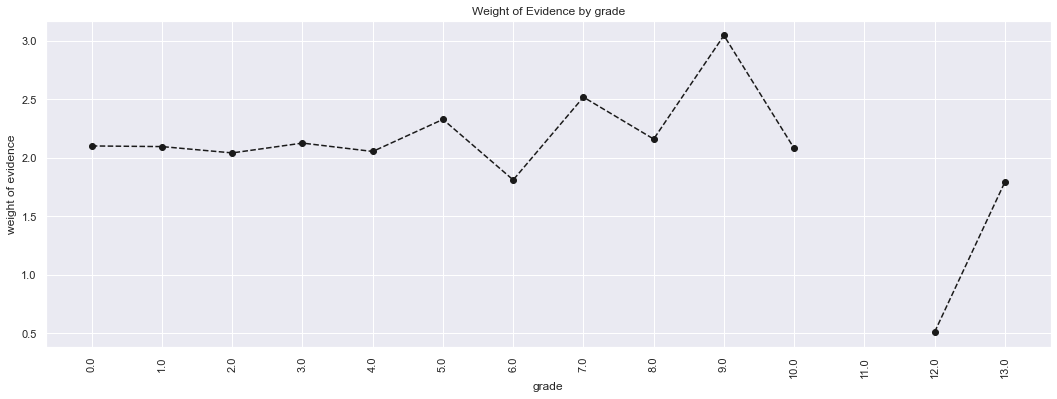

In [140]:
plot_by_woe(df_temp,90)

In [141]:
df_inputs_prepr['delinq_2yrs:0']=np.where((df_inputs_prepr['delinq_2yrs']>= 0.0),1,0)
df_inputs_prepr['delinq_2yrs:0-3']=np.where((df_inputs_prepr['delinq_2yrs']>0.0)&(df_inputs_prepr['delinq_2yrs']<=3),1,0)
df_inputs_prepr['delinq_2yrs:3-7']=np.where((df_inputs_prepr['delinq_2yrs']>3)&(df_inputs_prepr['delinq_2yrs']<=7),1,0)
df_inputs_prepr['delinq_2yrs:7-9']=np.where((df_inputs_prepr['delinq_2yrs']>7)&(df_inputs_prepr['delinq_2yrs']<=9),1,0)
df_inputs_prepr['delinq_2yrs:9-11']=np.where((df_inputs_prepr['delinq_2yrs']>9)&(df_inputs_prepr['delinq_2yrs']<=11),1,0)
df_inputs_prepr['delinq_2yrs:11-12']=np.where((df_inputs_prepr['delinq_2yrs']>11)&(df_inputs_prepr['delinq_2yrs']<=12),1,0)
df_inputs_prepr['delinq_2yrs:12-18']=np.where((df_inputs_prepr['delinq_2yrs']>12)&(df_inputs_prepr['delinq_2yrs']<=18),1,0)
df_inputs_prepr['delinq_2yrs:>18']=np.where((df_inputs_prepr['delinq_2yrs']>18),0,1)

In [142]:
df_inputs_prepr['inq_last_6mths']=df_inputs_prepr['inq_last_6mths'].astype(float)

In [143]:
df_temp=woe_continuous(df_inputs_prepr,'inq_last_6mths',df_targets_prepr)
df_temp

c:\Users\Reza Vahlevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,48295,0.910094,0.517870,43953.0,4342.0,0.529127,0.052271,2.314786,NaN,NaN,inf
1,1.0,25985,0.882394,0.278639,22929.0,3056.0,0.276030,0.036790,2.015296,0.027701,0.299490,inf
2,2.0,11611,0.861252,0.124505,10000.0,1611.0,0.120385,0.019394,1.825730,0.021141,0.189566,inf
3,3.0,5086,0.846245,0.054537,4304.0,782.0,0.051814,0.009414,1.705445,0.015008,0.120285,inf
4,4.0,1431,0.841370,0.015345,1204.0,227.0,0.014494,0.002733,1.668455,0.004875,0.036991,inf
5,5.0,551,0.842105,0.005908,464.0,87.0,0.005586,0.001047,1.673976,0.000736,0.005522,inf
6,6.0,211,0.763033,0.002263,161.0,50.0,0.001938,0.000602,1.169381,0.079072,0.504595,inf
7,7.0,36,0.527778,0.000386,19.0,17.0,0.000229,0.000205,0.111226,0.235255,1.058156,inf
8,8.0,21,0.523810,0.000225,11.0,10.0,0.000132,0.000120,0.095310,0.003968,0.015915,inf
9,9.0,7,0.428571,0.000075,3.0,4.0,0.000036,0.000048,-0.287682,0.095238,0.382992,inf


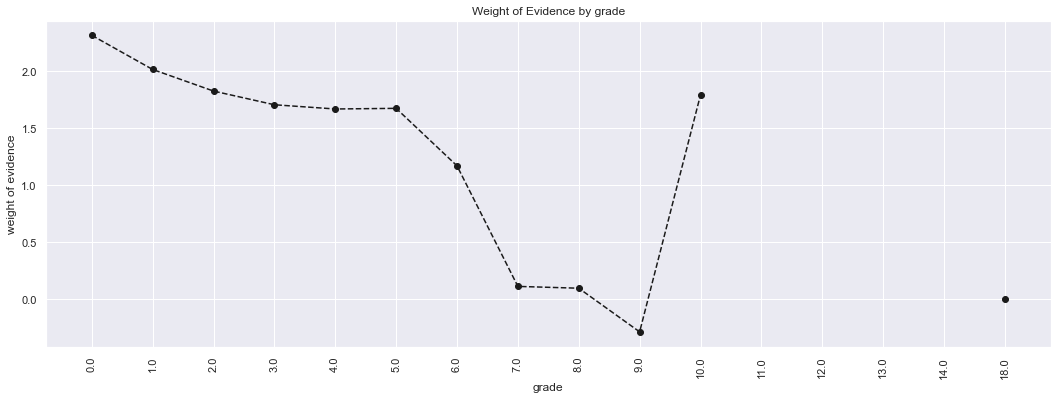

In [144]:
plot_by_woe(df_temp,90)

In [145]:
df_inputs_prepr['inq_last_6mths:0']=np.where((df_inputs_prepr['inq_last_6mths']>= 0.0),1,0)
df_inputs_prepr['inq_last_6mths:0-3']=np.where((df_inputs_prepr['inq_last_6mths']>0.0)&(df_inputs_prepr['inq_last_6mths']<=3),1,0)
df_inputs_prepr['inq_last_6mths:3-7']=np.where((df_inputs_prepr['inq_last_6mths']>3)&(df_inputs_prepr['inq_last_6mths']<=7),1,0)
df_inputs_prepr['inq_last_6mths:7-9']=np.where((df_inputs_prepr['inq_last_6mths']>7)&(df_inputs_prepr['inq_last_6mths']<=9),1,0)
df_inputs_prepr['inq_last_6mths:9-11']=np.where((df_inputs_prepr['inq_last_6mths']>9)&(df_inputs_prepr['inq_last_6mths']<=11),1,0)
df_inputs_prepr['inq_last_6mths:11-12']=np.where((df_inputs_prepr['inq_last_6mths']>11)&(df_inputs_prepr['inq_last_6mths']<=12),1,0)
df_inputs_prepr['inq_last_6mths:12-18']=np.where((df_inputs_prepr['inq_last_6mths']>12)&(df_inputs_prepr['inq_last_6mths']<=18),1,0)
df_inputs_prepr['inq_last_6mths:18']=np.where((df_inputs_prepr['inq_last_6mths']>18),0,1)

In [146]:
df_inputs_prepr['open_acc']=df_inputs_prepr['open_acc'].astype(float)
df_temp=woe_continuous(df_inputs_prepr,'open_acc',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,NaN,NaN,0.742566
1,1.0,32,0.875000,0.000343,28.0,4.0,0.000337,0.000048,1.945910,0.125000,inf,0.742566
2,2.0,334,0.838323,0.003582,280.0,54.0,0.003371,0.000650,1.645806,0.036677,0.300105,0.742566
3,3.0,1122,0.852941,0.012031,957.0,165.0,0.011521,0.001986,1.757858,0.014618,0.112052,0.742566
4,4.0,2560,0.892188,0.027451,2284.0,276.0,0.027496,0.003323,2.113283,0.039246,0.355425,0.742566
5,5.0,4403,0.891438,0.047214,3925.0,478.0,0.047251,0.005754,2.105511,0.000750,0.007772,0.742566
6,6.0,6216,0.890766,0.066655,5537.0,679.0,0.066657,0.008174,2.098587,0.000672,0.006924,0.742566
7,7.0,7433,0.886856,0.079704,6592.0,841.0,0.079358,0.010124,2.059020,0.003910,0.039567,0.742566
8,8.0,8314,0.893433,0.089151,7428.0,886.0,0.089422,0.010666,2.126295,0.006577,0.067275,0.742566
9,9.0,8768,0.888230,0.094020,7788.0,980.0,0.093756,0.011798,2.072787,0.005203,0.053508,0.742566


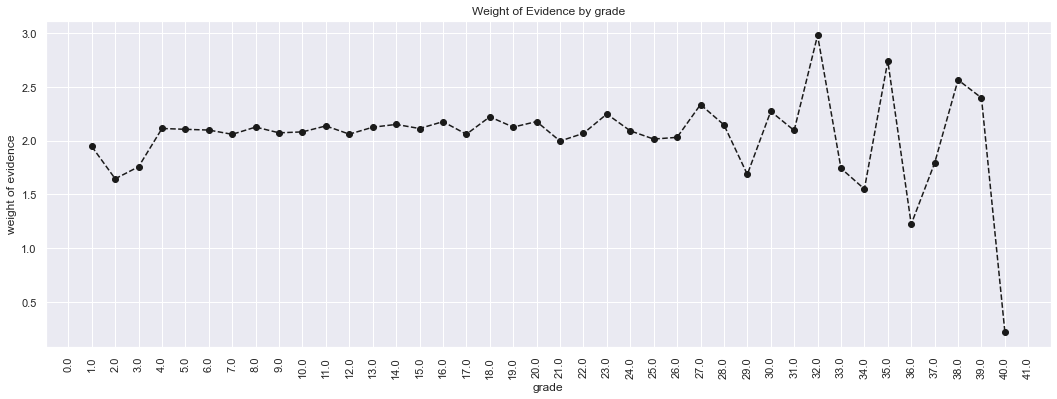

In [147]:
plot_by_woe(df_temp,90)

In [148]:
df_inputs_prepr['open_acc:>=0']=np.where((df_inputs_prepr['open_acc']>= 0.0),1,0)
df_inputs_prepr['open_acc:0-1']=np.where((df_inputs_prepr['open_acc']>0.0)&(df_inputs_prepr['open_acc']<=1),1,0)
df_inputs_prepr['open_acc:1-4']=np.where((df_inputs_prepr['open_acc']>1)&(df_inputs_prepr['open_acc']<=4),1,0)
df_inputs_prepr['open_acc:4-28']=np.where((df_inputs_prepr['open_acc']>4)&(df_inputs_prepr['open_acc']<=28),1,0)
df_inputs_prepr['open_acc:28-35']=np.where((df_inputs_prepr['open_acc']>28)&(df_inputs_prepr['open_acc']<=35),1,0)
df_inputs_prepr['open_acc:35-45']=np.where((df_inputs_prepr['open_acc']>35)&(df_inputs_prepr['open_acc']<=45),1,0)
df_inputs_prepr['open_acc:<45']=np.where((df_inputs_prepr['open_acc']<=45),0,1)

In [149]:
df_inputs_prepr['pub_rec']=df_inputs_prepr['pub_rec'].astype(float)

In [150]:
df_temp=woe_continuous(df_inputs_prepr,'pub_rec',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,80923,0.889179,0.867742,71955.0,8968.0,0.866228,0.107961,2.082378,NaN,NaN,0.7426
1,1.0,10670,0.901125,0.114415,9615.0,1055.0,0.115750,0.012701,2.209784,0.011946,0.127405,0.7426
2,2.0,1097,0.904284,0.011763,992.0,105.0,0.011942,0.001264,2.245763,0.003160,0.035979,0.7426
3,3.0,331,0.900302,0.003549,298.0,33.0,0.003587,0.000397,2.200586,0.003982,0.045177,0.7426
4,4.0,112,0.857143,0.001201,96.0,16.0,0.001156,0.000193,1.791759,0.043159,0.408826,0.7426
5,5.0,73,0.904110,0.000783,66.0,7.0,0.000795,0.000084,2.243745,0.046967,0.451985,0.7426
6,6.0,19,0.894737,0.000204,17.0,2.0,0.000205,0.000024,2.140066,0.009373,0.103678,0.7426
7,7.0,14,0.785714,0.000150,11.0,3.0,0.000132,0.000036,1.299283,0.109023,0.840783,0.7426
8,8.0,5,0.800000,0.000054,4.0,1.0,0.000048,0.000012,1.386294,0.014286,0.087011,0.7426
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.200000,inf,0.7426


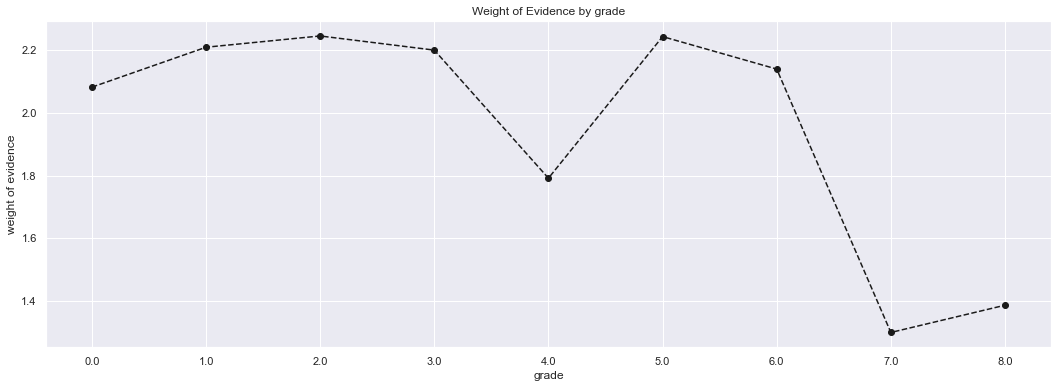

In [151]:
plot_by_woe(df_temp)

In [152]:
df_inputs_prepr['pub_rec:0-3']=np.where((df_inputs_prepr['pub_rec']>0)&(df_inputs_prepr['pub_rec']<=3),1,0)
df_inputs_prepr['pub_rec:3-6']=np.where((df_inputs_prepr['pub_rec']>3)&(df_inputs_prepr['pub_rec']<=6),1,0)
df_inputs_prepr['pub_rec:6-8']=np.where((df_inputs_prepr['pub_rec']>6)&(df_inputs_prepr['pub_rec']<=8),1,0)
df_inputs_prepr['pub_rec:8']=np.where((df_inputs_prepr['pub_rec']>8),0,1)

In [153]:
df_inputs_prepr['total_acc']=df_inputs_prepr['total_acc'].astype(float)

In [154]:
df_inputs_prepr['total_acc_fac']=pd.cut(df_inputs_prepr['total_acc'],50)

In [155]:
df_temp=woe_continuous(df_inputs_prepr,'total_acc_fac',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",125,0.776000,0.001340,97.0,28.0,0.001168,0.000337,1.242506,NaN,NaN,0.743034
1,"(3.12, 6.24]",1499,0.850567,0.016074,1275.0,224.0,0.015349,0.002697,1.739055,0.074567,0.496549,0.743034
2,"(6.24, 9.36]",3715,0.871871,0.039836,3239.0,476.0,0.038993,0.005730,1.917602,0.021304,0.178547,0.743034
3,"(9.36, 12.48]",6288,0.874841,0.067427,5501.0,787.0,0.066224,0.009474,1.944457,0.002970,0.026855,0.743034
4,"(12.48, 15.6]",8289,0.888286,0.088883,7363.0,926.0,0.088639,0.011148,2.073349,0.013445,0.128892,0.743034
5,"(15.6, 18.72]",9843,0.890176,0.105547,8762.0,1081.0,0.105481,0.013014,2.092538,0.001890,0.019189,0.743034
6,"(18.72, 21.84]",10270,0.893866,0.110126,9180.0,1090.0,0.110513,0.013122,2.130850,0.003690,0.038312,0.743034
7,"(21.84, 24.96]",9971,0.892789,0.106920,8902.0,1069.0,0.107167,0.012869,2.119552,0.001077,0.011297,0.743034
8,"(24.96, 28.08]",11873,0.892108,0.127315,10592.0,1281.0,0.127512,0.015421,2.112458,0.000681,0.007094,0.743034
9,"(28.08, 31.2]",7289,0.892715,0.078160,6507.0,782.0,0.078334,0.009414,2.118779,0.000607,0.006321,0.743034


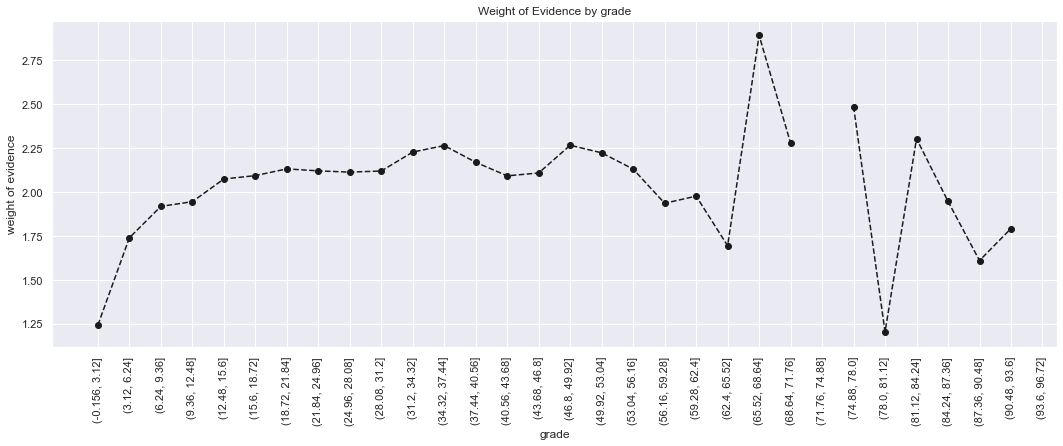

In [156]:
plot_by_woe(df_temp,90)

In [157]:
df_inputs_prepr['total_acc:<0']=np.where((df_inputs_prepr['total_acc']<0),0,1)
df_inputs_prepr['total_acc:0-4']=np.where((df_inputs_prepr['total_acc']>0)&(df_inputs_prepr['total_acc']<=4),1,0)
df_inputs_prepr['total_acc:4-62']=np.where((df_inputs_prepr['total_acc']>4)&(df_inputs_prepr['total_acc']<=62),1,0)
df_inputs_prepr['total_acc:62-72']=np.where((df_inputs_prepr['total_acc']>62)&(df_inputs_prepr['total_acc']<=72),1,0)
df_inputs_prepr['total_acc:72-85']=np.where((df_inputs_prepr['total_acc']>72)&(df_inputs_prepr['total_acc']<=85),0,1)
df_inputs_prepr['total_acc:>85']=np.where((df_inputs_prepr['total_acc']>85),0,1)

In [158]:
df_inputs_prepr['acc_now_delinq']=df_inputs_prepr['acc_now_delinq'].astype(float)

In [159]:
df_temp=woe_continuous(df_inputs_prepr,'acc_now_delinq',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,92871,0.890827,0.995861,82732.0,10139.0,0.995967,0.122058,2.099217,NaN,NaN,0.742624
1,1.0,360,0.872222,0.003860,314.0,46.0,0.003780,0.000554,1.920752,0.018605,0.178466,0.742624
2,2.0,22,0.818182,0.000236,18.0,4.0,0.000217,0.000048,1.504077,0.054040,0.416674,0.742624
3,3.0,4,0.750000,0.000043,3.0,1.0,0.000036,0.000012,1.098612,0.068182,0.405465,0.742624


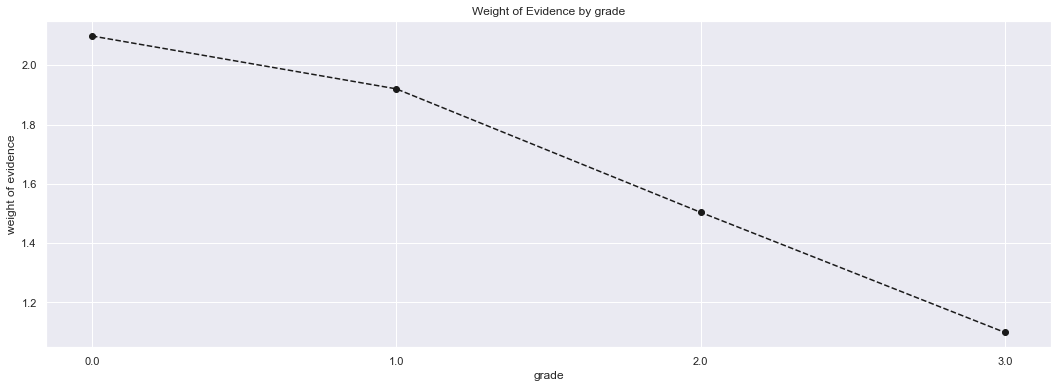

In [160]:
plot_by_woe(df_temp)

In [161]:
df_inputs_prepr['acc_now_delinq:<0']=np.where((df_inputs_prepr['acc_now_delinq']<0),0,1)
df_inputs_prepr['acc_now_delinq:0-1']=np.where((df_inputs_prepr['acc_now_delinq']>0)&(df_inputs_prepr['acc_now_delinq']<=1),1,0)
df_inputs_prepr['acc_now_delinq:1-2']=np.where((df_inputs_prepr['acc_now_delinq']>1)&(df_inputs_prepr['acc_now_delinq']<=2),1,0)
df_inputs_prepr['acc_now_delinq:2-3']=np.where((df_inputs_prepr['acc_now_delinq']>2)&(df_inputs_prepr['acc_now_delinq']<=3),1,0)
df_inputs_prepr['acc_now_delinq:3-5']=np.where((df_inputs_prepr['acc_now_delinq']>3)&(df_inputs_prepr['acc_now_delinq']<=5),0,1)
df_inputs_prepr['acc_now_delinq:>5']=np.where((df_inputs_prepr['acc_now_delinq']>5),0,1)

In [162]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['total_rev_hi_lim']<= 80000,:]

In [163]:
df_inputs_prepr['total_rev_hi_lim_factor']=pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'],50)
df_temp=woe_continuous(df_inputs_prepr,'total_rev_hi_lim_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-80.0, 1600.0]",561,0.805704,0.006256,452.0,109.0,0.005672,0.001368,1.422334,NaN,NaN,0.741962
1,"(1600.0, 3200.0]",1670,0.863473,0.018622,1442.0,228.0,0.018095,0.002861,1.844441,0.057769,0.422106,0.741962
2,"(3200.0, 4800.0]",2517,0.870083,0.028067,2190.0,327.0,0.027481,0.004103,1.901697,0.006610,0.057256,0.741962
3,"(4800.0, 6400.0]",4128,0.872335,0.046032,3601.0,527.0,0.045186,0.006613,1.921766,0.002252,0.020070,0.741962
4,"(6400.0, 8000.0]",4393,0.873890,0.048987,3839.0,554.0,0.048173,0.006952,1.935803,0.001555,0.014036,0.741962
5,"(8000.0, 9600.0]",4161,0.876472,0.046400,3647.0,514.0,0.045764,0.006450,1.959437,0.002582,0.023634,0.741962
6,"(9600.0, 11200.0]",5151,0.874782,0.057439,4506.0,645.0,0.056543,0.008094,1.943915,0.001690,0.015522,0.741962
7,"(11200.0, 12800.0]",4752,0.876263,0.052990,4164.0,588.0,0.052251,0.007378,1.957504,0.001481,0.013590,0.741962
8,"(12800.0, 14400.0]",4349,0.882042,0.048496,3836.0,513.0,0.048135,0.006437,2.011910,0.005779,0.054405,0.741962
9,"(14400.0, 16000.0]",4909,0.877572,0.054741,4308.0,601.0,0.054058,0.007542,1.969634,0.004470,0.042275,0.741962


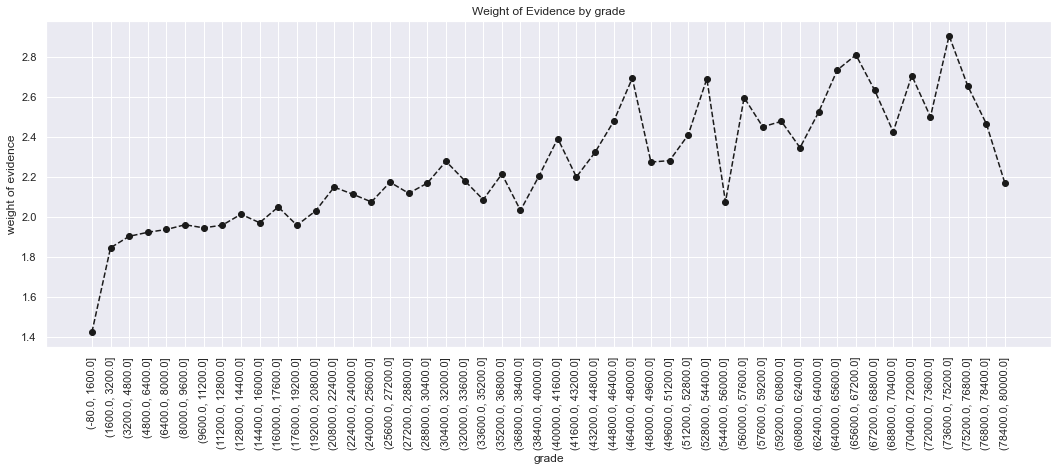

In [164]:
plot_by_woe(df_temp,90)

In [165]:
df_inputs_prepr['total_rev_hi_lim:<=5k']=np.where((df_inputs_prepr['total_rev_hi_lim']<= 5000),1,0)
df_inputs_prepr['total_rev_hi_lim:5k_10k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 5000) & (df_inputs_prepr['total_rev_hi_lim']<= 10000),1,0)
df_inputs_prepr['total_rev_hi_lim:10k_20k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 10000) & (df_inputs_prepr['total_rev_hi_lim']<= 20000),1,0)
df_inputs_prepr['total_rev_hi_lim:20k_30k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 20000) & (df_inputs_prepr['total_rev_hi_lim']<= 30000),1,0)
df_inputs_prepr['total_rev_hi_lim:30k_40k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 30000) & (df_inputs_prepr['total_rev_hi_lim']<= 40000),1,0)
df_inputs_prepr['total_rev_hi_lim:40k_50k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 40000) & (df_inputs_prepr['total_rev_hi_lim']<= 50000),1,0)
df_inputs_prepr['total_rev_hi_lim:50k_65k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 50000) & (df_inputs_prepr['total_rev_hi_lim']<= 65000),1,0)
df_inputs_prepr['total_rev_hi_lim:65k_80k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 65000) & (df_inputs_prepr['total_rev_hi_lim']<= 80000),1,0)
df_inputs_prepr['total_rev_hi_lim:>80k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 80000),1,0)

In [166]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp=woe_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 79752.0]",62621,0.877932,0.671488,54977.0,7644.0,0.661839,0.092022,1.972994,NaN,NaN,0.744584
1,"(79752.0, 154704.0]",26582,0.915206,0.285040,24328.0,2254.0,0.292872,0.027135,2.378922,0.037273,0.405928,0.744584
2,"(154704.0, 229656.0]",2916,0.926269,0.031268,2701.0,215.0,0.032516,0.002588,2.530739,0.011063,0.151818,0.744584
3,"(229656.0, 304608.0]",710,0.928169,0.007613,659.0,51.0,0.007933,0.000614,2.558898,0.001900,0.028159,0.744584
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001914,0.000144,2.583998,0.001656,0.025100,0.744584
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001240,0.000096,2.555287,0.001897,0.028710,0.744584
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000614,0.000024,3.238678,0.034336,0.683391,0.744584
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000012,3.465736,0.007433,0.227057,0.744584
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,0.030303,inf,0.744584
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000012,2.484907,0.076923,inf,0.744584


In [167]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<= 140000,:]

In [168]:
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp=woe_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr)
df_temp

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_2796\1201041880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000128,0.000000,inf,NaN,NaN,0.74268
1,"(7504.0, 10208.0]",84,0.761905,0.000958,64.0,20.0,0.000822,0.000257,1.163151,0.238095,inf,0.74268
2,"(10208.0, 12912.0]",123,0.780488,0.001403,96.0,27.0,0.001232,0.000347,1.268511,0.018583,0.105361,0.74268
3,"(12912.0, 15616.0]",304,0.851974,0.003467,259.0,45.0,0.003325,0.000578,1.750166,0.071486,0.481654,0.74268
4,"(15616.0, 18320.0]",383,0.827676,0.004368,317.0,66.0,0.004069,0.000847,1.569247,0.024297,0.180919,0.74268
5,"(18320.0, 21024.0]",733,0.840382,0.008359,616.0,117.0,0.007907,0.001502,1.661073,0.012706,0.091826,0.74268
6,"(21024.0, 23728.0]",704,0.846591,0.008028,596.0,108.0,0.007651,0.001386,1.708109,0.006209,0.047036,0.74268
7,"(23728.0, 26432.0]",1785,0.861064,0.020356,1537.0,248.0,0.019730,0.003183,1.824159,0.014474,0.116050,0.74268
8,"(26432.0, 29136.0]",1355,0.853137,0.015452,1156.0,199.0,0.014839,0.002554,1.759416,0.007928,0.064743,0.74268
9,"(29136.0, 31840.0]",2292,0.854276,0.026137,1958.0,334.0,0.025134,0.004287,1.768538,0.001139,0.009122,0.74268


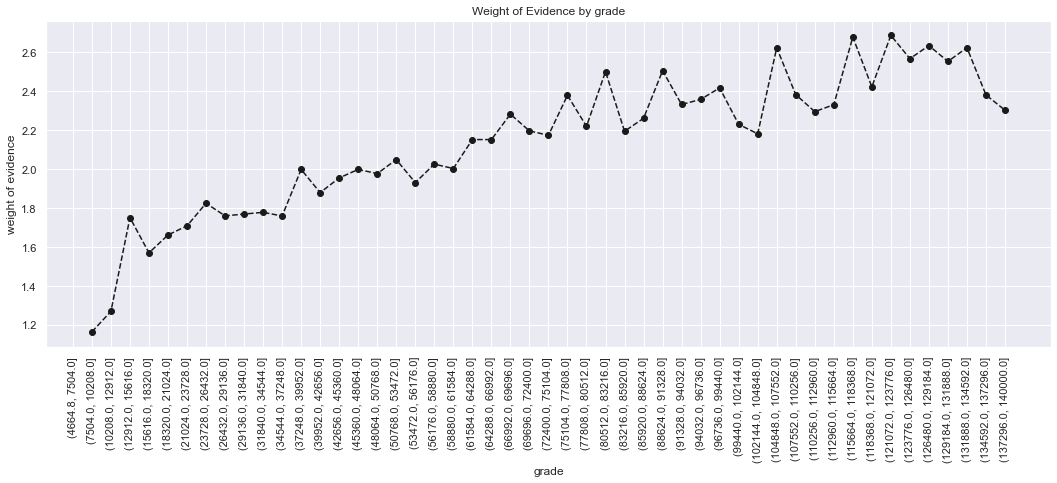

In [169]:
plot_by_woe(df_temp,90)

In [170]:
df_inputs_prepr['annual_inc:<20k']=np.where((df_inputs_prepr['annual_inc']<= 20000),1,0)
df_inputs_prepr['annual_inc:20k-30k']=np.where((df_inputs_prepr['annual_inc']> 20000) & (df_inputs_prepr['annual_inc']<= 30000),1,0)
df_inputs_prepr['annual_inc:30k-40k']=np.where((df_inputs_prepr['annual_inc']> 30000) & (df_inputs_prepr['annual_inc']<= 40000),1,0)
df_inputs_prepr['annual_inc:40k-50k']=np.where((df_inputs_prepr['annual_inc']> 40000) & (df_inputs_prepr['annual_inc']<= 50000),1,0)
df_inputs_prepr['annual_inc:50k-60k']=np.where((df_inputs_prepr['annual_inc']> 50000) & (df_inputs_prepr['annual_inc']<= 60000),1,0)
df_inputs_prepr['annual_inc:60k-70k']=np.where((df_inputs_prepr['annual_inc']> 60000) & (df_inputs_prepr['annual_inc']<= 70000),1,0)
df_inputs_prepr['annual_inc:70k-80k']=np.where((df_inputs_prepr['annual_inc']> 70000) & (df_inputs_prepr['annual_inc']<= 80000),1,0)
df_inputs_prepr['annual_inc:80k-90k']=np.where((df_inputs_prepr['annual_inc']> 80000) & (df_inputs_prepr['annual_inc']<= 90000),1,0)
df_inputs_prepr['annual_inc:90k-100k']=np.where((df_inputs_prepr['annual_inc']> 90000) & (df_inputs_prepr['annual_inc']<= 100000),1,0)
df_inputs_prepr['annual_inc:100k-120k']=np.where((df_inputs_prepr['annual_inc']> 100000) & (df_inputs_prepr['annual_inc']<= 120000),1,0)
df_inputs_prepr['annual_inc:120k-140k']=np.where((df_inputs_prepr['annual_inc']> 120000) & (df_inputs_prepr['annual_inc']<= 140000),1,0)
df_inputs_prepr['annual_inc:>140k']=np.where((df_inputs_prepr['annual_inc']> 140000),1,0)

In [171]:
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp=woe_continuous(df_inputs_prepr_temp,'mths_since_last_delinq_factor',df_targets_prepr)
df_temp

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_2796\3844945511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.17, 3.4]",1348,0.868694,0.031283,1171.0,177.0,0.030501,0.004610,1.889464,NaN,NaN,0.742674
1,"(3.4, 6.8]",1890,0.880423,0.043861,1664.0,226.0,0.043342,0.005887,1.996445,0.011729,0.106981,0.742674
2,"(6.8, 10.2]",3373,0.887044,0.078276,2992.0,381.0,0.077933,0.009924,2.060898,0.006621,0.064453,0.742674
3,"(10.2, 13.6]",2496,0.895833,0.057924,2236.0,260.0,0.058241,0.006772,2.151762,0.008789,0.090864,0.742674
4,"(13.6, 17.0]",3165,0.884044,0.073449,2798.0,367.0,0.072880,0.009559,2.031298,0.011789,0.120464,0.742674
5,"(17.0, 20.4]",2282,0.893076,0.052958,2038.0,244.0,0.053084,0.006355,2.122556,0.009032,0.091258,0.742674
6,"(20.4, 23.8]",2115,0.898345,0.049082,1900.0,215.0,0.049489,0.005600,2.178971,0.005269,0.056415,0.742674
7,"(23.8, 27.2]",2755,0.895463,0.063934,2467.0,288.0,0.064258,0.007502,2.147798,0.002882,0.031174,0.742674
8,"(27.2, 30.6]",1929,0.896319,0.044766,1729.0,200.0,0.045035,0.005209,2.156981,0.000857,0.009183,0.742674
9,"(30.6, 34.0]",2453,0.891969,0.056926,2188.0,265.0,0.056991,0.006902,2.111013,0.004350,0.045968,0.742674


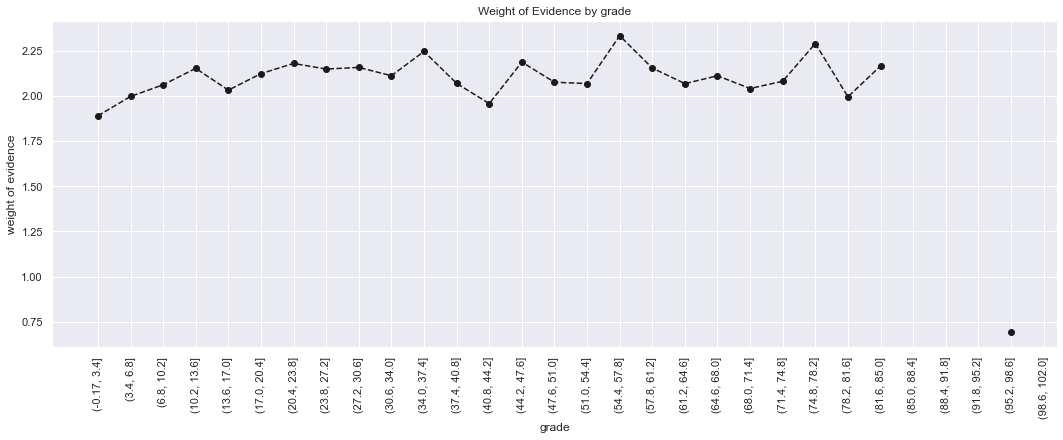

In [172]:
plot_by_woe(df_temp,90)

In [173]:
df_inputs_prepr['mths_since_last_delinq:Missing']=np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-3']=np.where((df_inputs_prepr['mths_since_last_delinq']>=0)&(df_inputs_prepr['mths_since_last_delinq']<=3),1,0)
df_inputs_prepr['mths_since_last_delinq:4-30']=np.where((df_inputs_prepr['mths_since_last_delinq']>=4)&(df_inputs_prepr['mths_since_last_delinq']<=30),1,0)
df_inputs_prepr['mths_since_last_delinq:31-56']=np.where((df_inputs_prepr['mths_since_last_delinq']>=31)&(df_inputs_prepr['mths_since_last_delinq']<=56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57']=np.where((df_inputs_prepr['mths_since_last_delinq']>=57),1,0)

In [174]:
df_inputs_prepr['dti_factor']=pd.cut(df_inputs_prepr['dti'],50)

In [175]:
df_temp=woe_continuous(df_inputs_prepr,'dti_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",371,0.886792,0.003978,329.0,42.0,0.003961,0.000506,2.058388,NaN,NaN,0.744604
1,"(0.8, 1.6]",478,0.899582,0.005126,430.0,48.0,0.005177,0.000578,2.192584,0.012789,0.134196,0.744604
2,"(1.6, 2.399]",639,0.902973,0.006852,577.0,62.0,0.006946,0.000746,2.230708,0.003392,0.038124,0.744604
3,"(2.399, 3.199]",808,0.912129,0.008664,737.0,71.0,0.008872,0.000855,2.339908,0.009155,0.109200,0.744604
4,"(3.199, 3.999]",1047,0.916905,0.011227,960.0,87.0,0.011557,0.001047,2.401025,0.004777,0.061117,0.744604
5,"(3.999, 4.799]",1260,0.912698,0.013511,1150.0,110.0,0.013844,0.001324,2.347037,0.004207,0.053988,0.744604
6,"(4.799, 5.599]",1527,0.912901,0.016374,1394.0,133.0,0.016782,0.001601,2.349583,0.000203,0.002547,0.744604
7,"(5.599, 6.398]",1730,0.905202,0.018551,1566.0,164.0,0.018852,0.001974,2.256413,0.007699,0.093170,0.744604
8,"(6.398, 7.198]",1999,0.919960,0.021435,1839.0,160.0,0.022139,0.001926,2.441803,0.014758,0.185390,0.744604
9,"(7.198, 7.998]",2227,0.908846,0.023880,2024.0,203.0,0.024366,0.002444,2.299625,0.011114,0.142178,0.744604


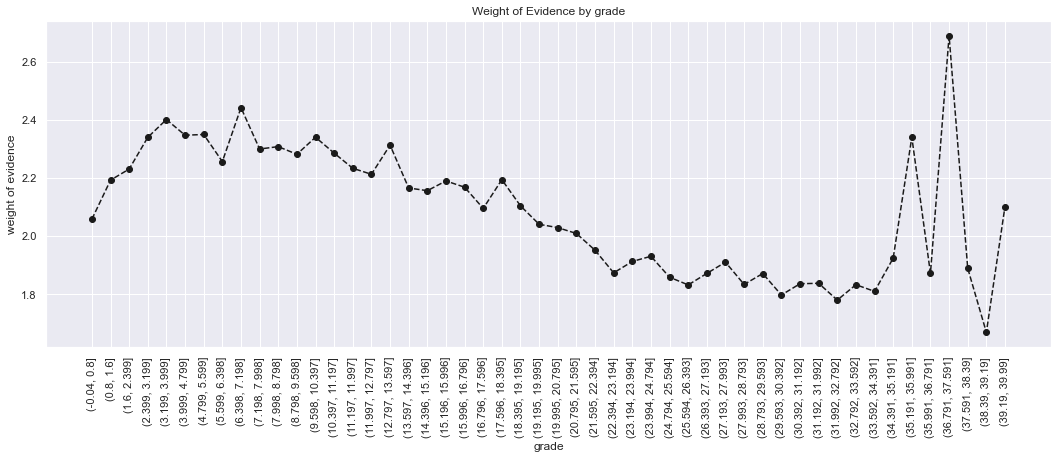

In [176]:
plot_by_woe(df_temp,90)

In [177]:
df_inputs_prepr['dti:<5']=np.where((df_inputs_prepr['dti']<= 5),1,0)
df_inputs_prepr['dti:5-10']=np.where((df_inputs_prepr['dti']> 5) & (df_inputs_prepr['dti']<= 10),1,0)
df_inputs_prepr['dti:10-15']=np.where((df_inputs_prepr['dti']> 10) & (df_inputs_prepr['dti']<= 15),1,0)
df_inputs_prepr['dti:15-20']=np.where((df_inputs_prepr['dti']> 15) & (df_inputs_prepr['dti']<= 20),1,0)
df_inputs_prepr['dti:20-25']=np.where((df_inputs_prepr['dti']> 20) & (df_inputs_prepr['dti']<= 25),1,0)
df_inputs_prepr['dti:25-30']=np.where((df_inputs_prepr['dti']> 25) & (df_inputs_prepr['dti']<= 30),1,0)
df_inputs_prepr['dti:30-35']=np.where((df_inputs_prepr['dti']> 30) & (df_inputs_prepr['dti']<= 35),1,0)
df_inputs_prepr['dti:35-40']=np.where((df_inputs_prepr['dti']> 35) & (df_inputs_prepr['dti']<= 40),1,0)
df_inputs_prepr['dti:>40']=np.where((df_inputs_prepr['dti']> 40),1,0)

In [178]:
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_2796\2010519048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


In [179]:
df_temp=woe_continuous(df_inputs_prepr_temp,'mths_since_last_record',df_targets_prepr)
df_temp

c:\Users\Reza Vahlevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",244,0.741803,0.019410,181.0,63.0,0.016036,0.005582,1.055362,NaN,NaN,inf
1,"(2.58, 5.16]",36,0.888889,0.002864,32.0,4.0,0.002835,0.000354,2.079442,0.147086,1.024079,inf
2,"(5.16, 7.74]",39,0.923077,0.003102,36.0,3.0,0.003190,0.000266,2.484907,0.034188,0.405465,inf
3,"(7.74, 10.32]",66,0.939394,0.005250,62.0,4.0,0.005493,0.000354,2.740840,0.016317,0.255933,inf
4,"(10.32, 12.9]",42,0.833333,0.003341,35.0,7.0,0.003101,0.000620,1.609438,0.106061,1.131402,inf
5,"(12.9, 15.48]",69,0.869565,0.005489,60.0,9.0,0.005316,0.000797,1.897120,0.036232,0.287682,inf
6,"(15.48, 18.06]",95,0.863158,0.007557,82.0,13.0,0.007265,0.001152,1.841770,0.006407,0.055350,inf
7,"(18.06, 20.64]",58,0.965517,0.004614,56.0,2.0,0.004961,0.000177,3.332205,0.102359,1.490435,inf
8,"(20.64, 23.22]",101,0.891089,0.008034,90.0,11.0,0.007974,0.000975,2.101914,0.074428,1.230290,inf
9,"(23.22, 25.8]",94,0.946809,0.007478,89.0,5.0,0.007885,0.000443,2.879198,0.055719,0.777284,inf


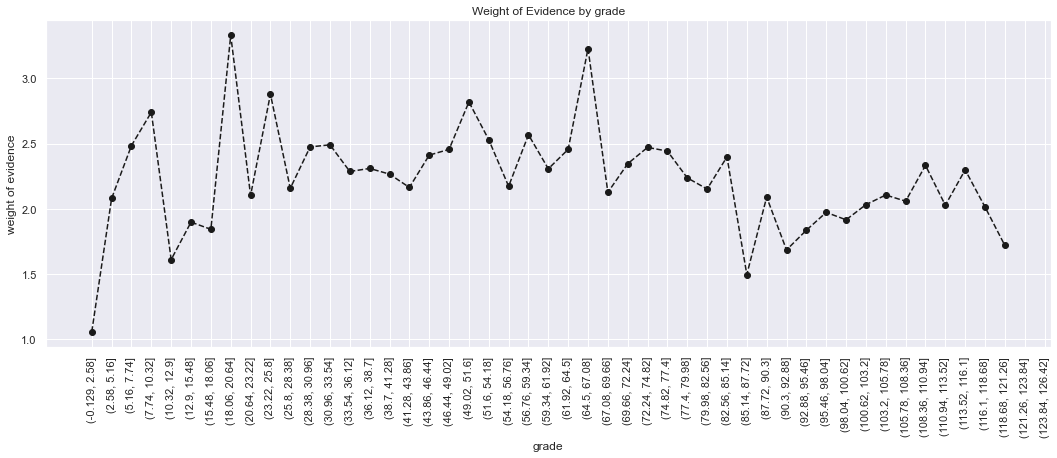

In [180]:
plot_by_woe(df_temp,90)

In [181]:
df_inputs_prepr['mths_since_last_record:Missing']=np.where((df_inputs_prepr['mths_since_last_record'].isnull()),1,0)
df_inputs_prepr['mths_since_last_record:0-90']=np.where((df_inputs_prepr['mths_since_last_record']>=0)&(df_inputs_prepr['mths_since_last_record']<=90),1,0)
df_inputs_prepr['mths_since_last_record:90-120']=np.where((df_inputs_prepr['mths_since_last_record']>=90)&(df_inputs_prepr['mths_since_last_record']<=120),1,0)
df_inputs_prepr['mths_since_last_record:120-127']=np.where((df_inputs_prepr['mths_since_last_record']>=120)&(df_inputs_prepr['mths_since_last_record']<=127),1,0)
df_inputs_prepr['mths_since_last_record:>=127']=np.where((df_inputs_prepr['mths_since_last_record']>=127),1,0)

In [187]:
loan_data_inputs_train= df_inputs_prepr
loan_data_inputs_train.shape

(93257, 338)

In [183]:
load_ds_targets_train.shape

(373028,)

In [184]:
loan_data_inputs_test= df_inputs_prepr
loan_data_inputs_test.shape

(93257, 338)

In [185]:
load_ds_targets_test.shape

(93257,)